In [49]:
from __future__ import annotations

import particle_in_a_box as pib
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
from typing import List
import default_plot as dp

lightColor = "#8bb1cc"
darkColor = "#0f4c75"

plt.rcParams["text.usetex"] = False
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Dejavu Serif'
plt.rcParams["mathtext.fontset"] = "cm"
plt.rcParams['animation.writer'] = 'ffmpeg'
plt.rcParams["animation.html"] = "jshtml"
plt.rcParams['animation.ffmpeg_path'] = 'C:\\ffmpeg\\bin\\ffmpeg.exe'

In [50]:
gamma = 10
L = np.pi
m = 1
states = [1,2,3,4,5,6]
amps = [1,0.5,0.25,0.125,0.1,0.1]

x_res = 300
x = np.linspace(-L/2-0.5, L/2+0.5, x_res)

k_res = 300
n_bound = 15
n = np.arange(-n_bound, n_bound+1, 1, dtype=int)


myState = pib.Particle_in_Box_State("symmetric", L, m, states, amps, gamma)
myState.case = "dirichlet_neumann"
myState.energy_space_wavefunction.energies

[1.125, 3.125, 6.125, 10.125, 15.124999999999995, 21.125000000000007]

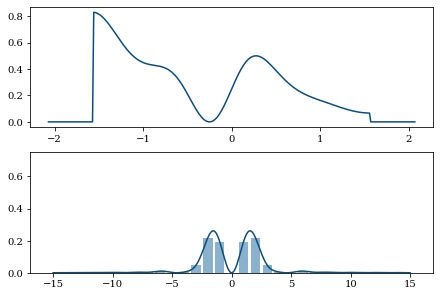

In [51]:
# Create Plot only
myState.case = "neumann"
myState.gamma = 0.0001

kn = myState.boundary_lib.get_kn(n)
k_bound = myState.boundary_lib.get_kn(n_bound)
k = np.linspace(-k_bound, k_bound, k_res)

x_space_wavefunc = myState.x_space_wavefunction
k_space_wavefunc = myState.k_space_wavefunction
new_k_space_wavefunc = myState.new_k_space_wavefunction

fig = plt.figure(constrained_layout=True)
gs = fig.add_gridspec(nrows=2, ncols=1, height_ratios=[1,1])
k_distr_plot = fig.add_subplot(gs[1,0])
x_distr_plot = fig.add_subplot(gs[0, 0])

k_distr_plot.set_ylim([0, 0.75])


k_lines = k_distr_plot.plot(k, np.abs(k_space_wavefunc(k, 0))**2, animated=True, color = darkColor)
x_lines = x_distr_plot.plot(x, np.abs(x_space_wavefunc(x, 0))**2, animated=True, color = darkColor)
k_bars = k_distr_plot.bar(kn, np.abs(new_k_space_wavefunc(n, 0))**2, animated=True, color = lightColor)

In [ ]:
# Expectation Value Graphs

myState.case = "symmetric"
x_exp_val = myState.x_space_expectation_value
k_exp_val = myState.new_k_space_expectation_value
x_derif = myState.x_space_expectation_value_derivative

t = np.arange(0, 2.5, 0.00001)

plt.plot(t, x_exp_val(t), label=r"$\langle x \rangle$")
plt.plot(t, k_exp_val(t), label=r"$\langle p_R \rangle$")
plt.plot(t, x_derif(t), ls="--",label=r"$\frac{d}{dt} \langle x \rangle$")
plt.legend()



In [ ]:
# Create Animations
myState.case = "dirichlet_neumann"
myState.gamma = 100000
myState.reset()
myState.add_state([2,3], [1,1])


x_space_wavefunc = myState.x_space_wavefunction
k_space_wavefunc = myState.k_space_wavefunction
new_k_space_wavefunc = myState.new_k_space_wavefunction
x_exp_val = myState.x_space_expectation_value
k_exp_val = myState.new_k_space_expectation_value


kn = myState._sp.boundary_lib.get_kn(n)
k_bound = myState._sp.boundary_lib.get_kn(n_bound)
k = np.linspace(-k_bound, k_bound, k_res)

fig = plt.figure(constrained_layout=True)
gs = fig.add_gridspec(nrows=2, ncols=1, height_ratios=[1,1])
kDistrPlot = fig.add_subplot(gs[1,0])
xDistrPlot = fig.add_subplot(gs[0, 0])

kDistrPlot.set_ylim([0, 0.5])

k_lines = kDistrPlot.plot(k, np.abs(k_space_wavefunc(k, 0))**2, animated=True, color = darkColor)
x_lines = xDistrPlot.plot(x, np.abs(x_space_wavefunc(x, 0))**2, animated=True, color = darkColor)
k_bars = kDistrPlot.bar(kn, np.abs(new_k_space_wavefunc(n, 0))**2, animated=True, color = lightColor)
x_exp_line = xDistrPlot.axvline(x_exp_val(0), animated=True, color = darkColor)
k_exp_line = kDistrPlot.axvline(k_exp_val(0), animated=True, color = darkColor)

fps = 20
time = 2.5
speed = 1
if myState._sp._num_energy_states == 2:
    time = 2*np.pi/abs(myState._esp._energies[0]-myState._esp._energies[1])/speed
    print("auto setting time to: ", time)

time_per_frame = 1/fps*speed
num_frames = time*fps

def init():
    return x_lines + k_lines + [x_exp_line] + [k_exp_line] + list(k_bars)

def animate(i):
    x_lines[0].set_data(x, np.abs(x_space_wavefunc(x, time_per_frame*i))**2)
    k_lines[0].set_data(k, np.abs(k_space_wavefunc(k, time_per_frame*i))**2)
    x_ev = x_exp_val(time_per_frame*i)
    k_ev = k_exp_val(time_per_frame*i)
    x_exp_line.set_data([x_ev, x_ev],[0,1])
    k_exp_line.set_data([k_ev, k_ev],[0,1])

    for bar, h in zip(k_bars, np.abs(new_k_space_wavefunc(n, i*time_per_frame))**2):
        bar.set_height(h)
    return x_lines + k_lines + [x_exp_line] + [k_exp_line] + list(k_bars)

anim = FuncAnimation(fig, animate, init_func=init, frames=int(num_frames), interval=int(1/fps*1000), blit=True)
anim


auto setting time to:  1.7954243807364354


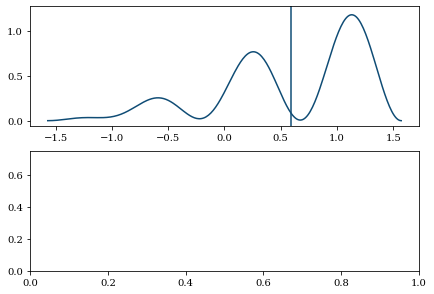

In [52]:
some_state = pib.Particle_in_Box_State("symmetric", np.pi, 1, [2,3], [1,1], gamma=0.0001)


fig = plt.figure(constrained_layout=True)
gs = fig.add_gridspec(nrows=2, ncols=1, height_ratios=[1,1])

pos_space_plot = dp.Position_Space_Plot(some_state, fig, gs, [0,0])
k_space_plot = dp.Momentum_Space_Plot(some_state, fig, gs, [1,0])
combined_plot = dp.Multi_Plot(pos_space_plot, k_space_plot)

pos_space_plot.expectation_value = True
some_state.gamma = 10000
pos_space_plot.animate(20, 1, 1)


115


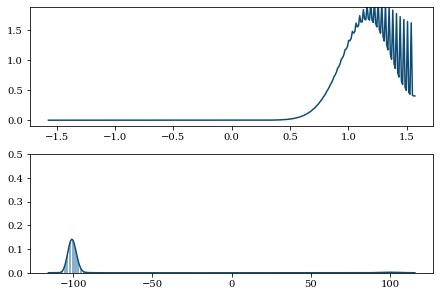

In [54]:
# Gaussian Playground
import Special_States as special

case = "dirichlet_neumann"
L = np.pi
m = 1
a = L/10
l_0 = 100
l_range = 15
gaussian = special.Bouncing_Gaussian(case, L, m, l_0, l_range, a)

T = ((4*m*L**2)/np.pi)

fig = plt.figure(constrained_layout=True)
gs = fig.add_gridspec(nrows=2, ncols=1)
gaussian_pos = dp.Position_Space_Plot(gaussian, fig, gs, [0,0])
gaussian_momentum = dp.Momentum_Space_Plot(gaussian, fig, gs, [1,0])


gaussian_plot = dp.Multi_Plot(gaussian_pos, gaussian_momentum)
gaussian_momentum.set_n_bound(l_0+l_range)
gaussian_momentum.axis.set_ylim([0, 0.5])

gaussian_plot.animate(20, 2, 0.01)